# Lab 3

**Adam Aiken**

March 8th, 2024

In [2]:
## Part 3

# Set-up, data import, and check

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib as mpl

# This lets us refer to the pyplot part of matplot lib more easily. Just use plt!
import matplotlib.pyplot as plt

# importing the style package
from matplotlib import style
from matplotlib.ticker import StrMethodFormatter


# Keeps warnings from cluttering up our notebook. 
#import warnings
#warnings.filterwarnings('ignore')

kc = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/kc_house_data.csv',
                      index_col=0)

kc['date'] = kc['date'].str.replace('T000000','')
kc['date'] = pd.to_datetime(kc['date'], format='%Y%m%d')

kc.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode   

In [3]:
# Part 4

kc_subset = kc.loc[:, ['date', 'price', 'sqft_living', 'bedrooms', 'waterfront', 'sqft_lot']]

kc_subset['year'] = kc_subset.loc[:, 'date'].dt.year
kc_subset['prc_sq_ft'] = kc_subset['price'] / kc_subset['sqft_living']

kc_subset.sort_values(by=['prc_sq_ft'], ascending=True).head(10)


,date,price,sqft_living,bedrooms,waterfront,sqft_lot,year,prc_sq_ft
id,,,,,,,,
2891000610,2014-12-11,148900.0,1700,4,0,6000,2014,87.588235
723049156,2014-05-23,149000.0,1700,3,0,8645,2014,87.647059
5637200450,2014-10-17,257000.0,2930,5,0,10148,2014,87.713311
5111400086,2014-05-12,110000.0,1250,3,0,53143,2014,88.000000
3342700465,2015-01-23,250000.0,2840,3,0,10182,2015,88.028169
8661000089,2014-07-16,199950.0,2270,3,0,13590,2014,88.083700
4222310010,2014-12-26,152500.0,1730,4,0,7350,2014,88.150289
7686202065,2014-07-23,170000.0,1920,4,0,7500,2014,88.541667
5379804470,2014-06-17,170000.0,1920,4,0,13787,2014,88.541667


Do you see my `.loc` statements above? You might be getting warnings if you're sub-setting (i.e. picking columns out of) a dataframe doing something like `kc['date']`. And, yeah, I do that a lot in my notes. That way was fine, but they are changing the preferred method. I should update my materials.

In [4]:
kc_subset['price'].min()

75000.0

In [5]:
kc_subset['price'].max()

7700000.0

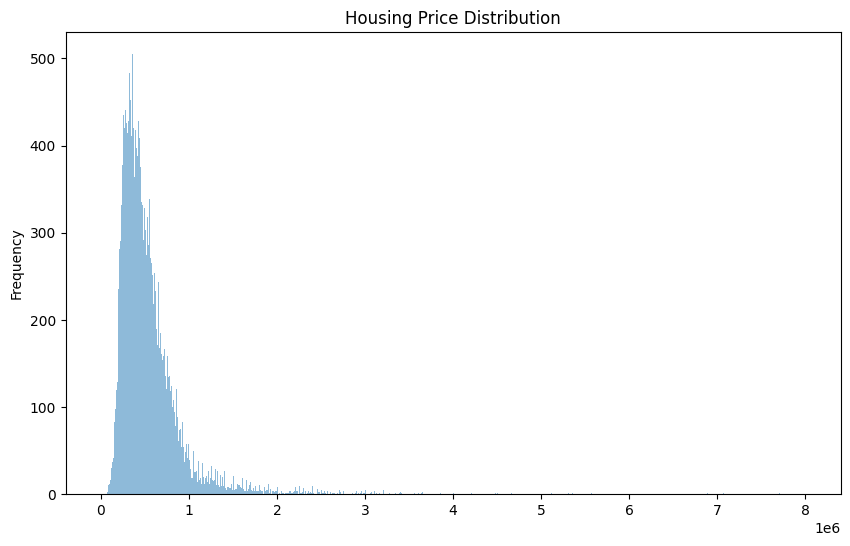

In [6]:
# Part 5

kc_subset.plot.hist(y = 'price', bins = 800, range =(0, 8000000), alpha = 0.5, title = 'Housing Price Distribution', figsize = (10,6), legend = False, style = 'ggplot')
plt.show()

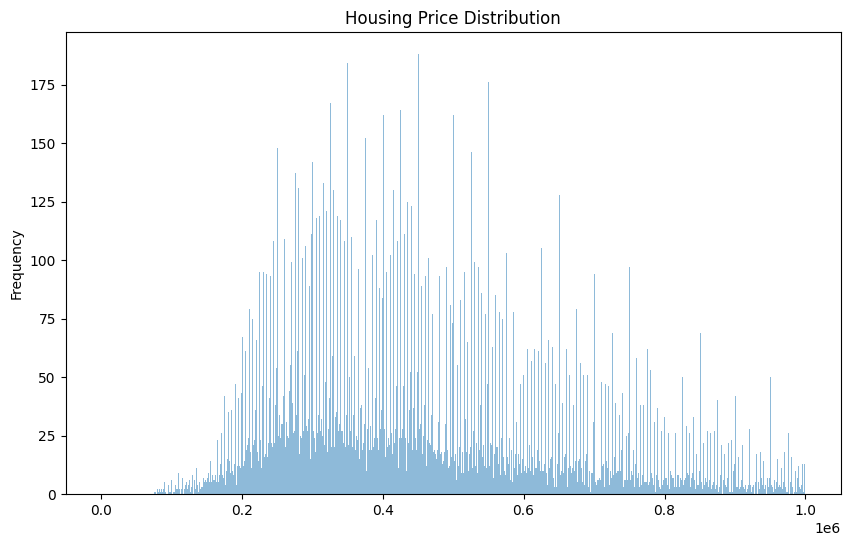

In [7]:
# Part 6 - Subsetting data for a plot and matplotlib plt

kc_subset[kc_subset['price'] < 1000000].plot.hist(y = 'price', bins = 800, range =(0, 1000000), alpha = 0.5, title = 'Housing Price Distribution', figsize = (10,6), legend = False, style = 'ggplot')
plt.show()


Why the spikes? These are prices being set at or just below round numbers. So, something like $499,000. 

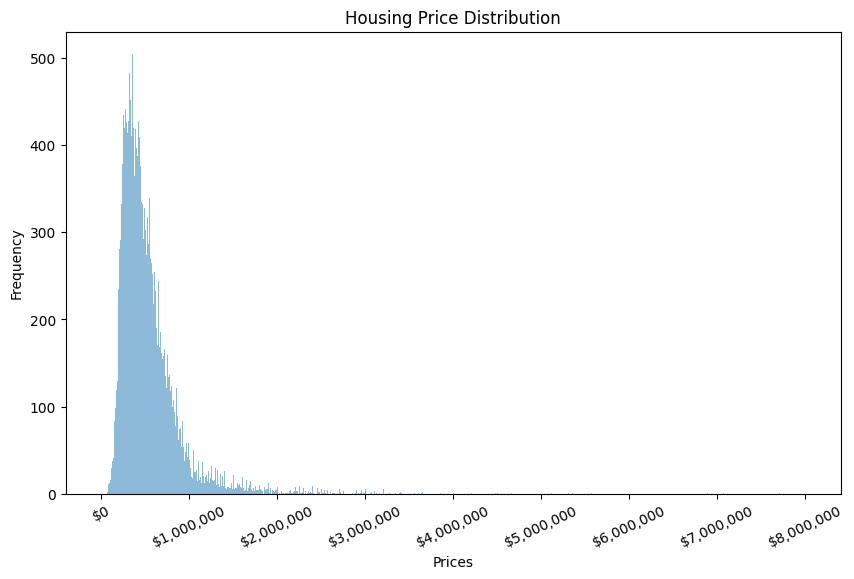

In [8]:
# This code is using matplotlib and plt.

plt.figure(figsize=(10, 6))

plt.hist(kc_subset['price'], alpha = 0.5, bins = 800, range = (0, 8000000))
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Housing Price Distribution')
plt.style.use('ggplot')
plt.ticklabel_format(axis='x', style='plain')
plt.tick_params(axis='x', rotation=25)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')); 


In [9]:
# Part 7 - Seaborn

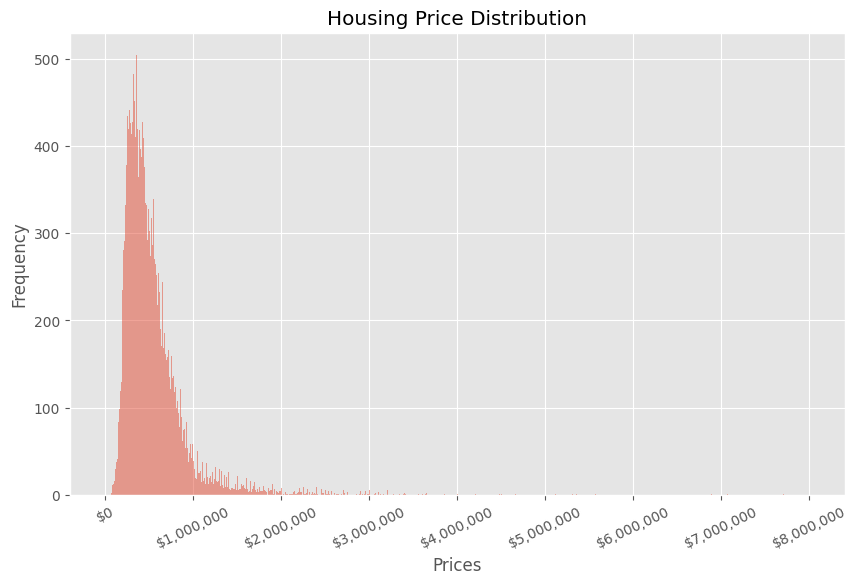

In [10]:
# Part 8 - Matplotlib ax and fig method

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)

ax.hist(kc_subset['price'], alpha = 0.5, bins = 800, range = (0, 8000000))

ax.set_xlabel('Prices')
ax.set_ylabel('Frequency')
ax.set_title('Housing Price Distribution')
ax.ticklabel_format(axis='x', style='plain')
ax.tick_params(axis='x', rotation=25)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


In [11]:
# Part 9 - Creating categorical variables

kc_subset['large_house'] = np.where(kc_subset['sqft_living']>2500, 'yes', 'no')

kc_subset['large_house'] = kc_subset['large_house'].astype('category')


kc_subset['sqft_living_100'] = kc_subset['sqft_living'].rank(pct=True, method='min')

print(kc_subset['sqft_living_100'].min())
print(kc_subset['sqft_living_100'].max())

4.6268449544255775e-05
1.0


In [12]:
# create a list of our conditions
conditions = [
    (kc_subset['sqft_living_100'] < 0.25),
    (kc_subset['sqft_living_100'] >= 0.25) & (kc_subset['sqft_living_100'] < 0.5),
    (kc_subset['sqft_living_100'] >= 0.5) & (kc_subset['sqft_living_100'] < 0.75),
    (kc_subset['sqft_living_100'] >= 0.75)
    ]

# create a list of the values we want to assign for each condition
values = ['q1', 'q2', 'q3', 'q4']

# create a new column and use np.select to assign values to it using our lists as arguments
kc_subset['large_house_4'] = np.select(conditions, values)

kc_subset['large_house_4'] = kc_subset['large_house_4'].astype('category')


In [13]:
# Part 10 - Bringing in our time series

dsf = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/crsp_022722.csv')

dsf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   2271 non-null   int64  
 1   date     2271 non-null   int64  
 2   TICKER   2271 non-null   object 
 3   CUSIP    2271 non-null   object 
 4   DISTCD   61 non-null     float64
 5   DIVAMT   61 non-null     float64
 6   FACPR    61 non-null     float64
 7   FACSHR   61 non-null     float64
 8   PRC      2271 non-null   float64
 9   VOL      2271 non-null   int64  
 10  RET      2271 non-null   float64
 11  SHROUT   2271 non-null   int64  
 12  CFACPR   2271 non-null   int64  
 13  CFACSHR  2271 non-null   int64  
 14  sprtrn   2271 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 266.3+ KB


In [14]:
dsf.head()

,PERMNO,date,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,sprtrn
0,11850,20190102,XOM,30231G10,NaN,NaN,NaN,NaN,69.69,16727246,0.021997,4233807,1,1,0.001269
1,11850,20190103,XOM,30231G10,NaN,NaN,NaN,NaN,68.62,13866115,-0.015354,4233807,1,1,-0.024757
2,11850,20190104,XOM,30231G10,NaN,NaN,NaN,NaN,71.15,16043642,0.036870,4233807,1,1,0.034336
3,11850,20190107,XOM,30231G10,NaN,NaN,NaN,NaN,71.52,10844159,0.005200,4233807,1,1,0.007010
4,11850,20190108,XOM,30231G10,NaN,NaN,NaN,NaN,72.04,11438966,0.007271,4233807,1,1,0.009695


In [15]:
dsf = dsf[(dsf['PRC'].notna()) & (dsf['RET'].notna())]

dsf['date']=pd.to_datetime(dsf['date'], format='%Y%m%d')

dsf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PERMNO   2271 non-null   int64         
 1   date     2271 non-null   datetime64[ns]
 2   TICKER   2271 non-null   object        
 3   CUSIP    2271 non-null   object        
 4   DISTCD   61 non-null     float64       
 5   DIVAMT   61 non-null     float64       
 6   FACPR    61 non-null     float64       
 7   FACSHR   61 non-null     float64       
 8   PRC      2271 non-null   float64       
 9   VOL      2271 non-null   int64         
 10  RET      2271 non-null   float64       
 11  SHROUT   2271 non-null   int64         
 12  CFACPR   2271 non-null   int64         
 13  CFACSHR  2271 non-null   int64         
 14  sprtrn   2271 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 266.3+ KB


In [16]:
dsf.head()

,PERMNO,date,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,sprtrn
0,11850,2019-01-02,XOM,30231G10,NaN,NaN,NaN,NaN,69.69,16727246,0.021997,4233807,1,1,0.001269
1,11850,2019-01-03,XOM,30231G10,NaN,NaN,NaN,NaN,68.62,13866115,-0.015354,4233807,1,1,-0.024757
2,11850,2019-01-04,XOM,30231G10,NaN,NaN,NaN,NaN,71.15,16043642,0.036870,4233807,1,1,0.034336
3,11850,2019-01-07,XOM,30231G10,NaN,NaN,NaN,NaN,71.52,10844159,0.005200,4233807,1,1,0.007010
4,11850,2019-01-08,XOM,30231G10,NaN,NaN,NaN,NaN,72.04,11438966,0.007271,4233807,1,1,0.009695


I'm checking my variables above - in particular, I want to see if date is really a `datetime`. Check out the `format=` part of the statement. This is telling `to_datetime()` how to bring in the date.

In [17]:
dsf.index

RangeIndex(start=0, stop=2271, step=1)

I haven't set an index... yet.

In [18]:
## Part 11 - Calculating adjusted prices and returns

dsf['PRC_ADJ'] = dsf['PRC'] / dsf['CFACPR']

You can also do math using functions like `.div()`.

In [19]:
dsf.set_index(['PERMNO', 'date'])

TICKER     CUSIP  DISTCD  DIVAMT  FACPR  FACSHR        PRC  \
PERMNO date                                                                    
11850  2019-01-02    XOM  30231G10     NaN     NaN    NaN     NaN   69.69000   
       2019-01-03    XOM  30231G10     NaN     NaN    NaN     NaN   68.62000   
       2019-01-04    XOM  30231G10     NaN     NaN    NaN     NaN   71.15000   
       2019-01-07    XOM  30231G10     NaN     NaN    NaN     NaN   71.52000   
       2019-01-08    XOM  30231G10     NaN     NaN    NaN     NaN   72.04000   
...                  ...       ...     ...     ...    ...     ...        ...   
89468  2021-12-27    TLT  46428743     NaN     NaN    NaN     NaN  148.88000   
       2021-12-28    TLT  46428743     NaN     NaN    NaN     NaN  148.28999   
       2021-12-29    TLT  46428743     NaN     NaN    NaN     NaN  146.67000   
       2021-12-30    TLT  46428743     NaN     NaN    NaN     NaN  147.89999   
       2021-12-31    TLT  46428743     NaN     NaN    NaN     NaN  148.19000   

                        VOL       RET   SHROUT  CFACPR  CFACSHR    sprtrn  \
PERMNO date                                                                 
11850  2019-01-02  16727246  0.021997  4233807       1        1  0.001269   
       2019-01-03  13866115 -0.015354  4233807       1        1 -0.024757   
       2019-01-04  16043642  0.036870  4233807       1        1  0.034336   
       2019-01-07  10844159  0.005200  4233807       1        1  0.007010   
       2019-01-08  11438966  0.007271  4233807       1        1  0.009695   
...                     ...       ...      ...     ...      ...       ...   
89468  2021-12-27   7854290  0.002424   132000       1        1  0.013839   
       2021-12-28   9173504 -0.003963   133200       1        1 -0.001010   
       2021-12-29  11763496 -0.010925   133400       1        1  0.001402   
       2021-12-30  10340148  0.008386   133400       1        1 -0.002990   
       2021-12-31  13389734  0.001961   132800       1        1 -0.002626   

                     PRC_ADJ  
PERMNO date                   
11850  2019-01-02   69.69000  
       2019-01-03   68.62000  
       2019-01-04   71.15000  
       2019-01-07   71.52000  
       2019-01-08   72.04000  
...                      ...  
89468  2021-12-27  148.88000  
       2021-12-28  148.28999  
       2021-12-29  146.67000  
       2021-12-30  147.89999  
       2021-12-31  148.19000  

[2271 rows x 14 columns]

See the two indices above?

In [20]:
dsf['PRC_ADJ_LAG1'] = dsf.groupby(['PERMNO'])['PRC_ADJ'].shift(1)
dsf['DIVAMT']=dsf['DIVAMT'].fillna(0)


Pay **very close attention** to how these `groupby()` statements work, when you use `()` and when you use`[]`. You use `[]` when picking out a column.

In [21]:
dsf['RETURN'] = (dsf['PRC_ADJ'] + dsf['DIVAMT']) / dsf['PRC_ADJ_LAG1'] - 1

dsf['RET_DIFF'] = dsf['RETURN'] - dsf['RET']

dsf['RET_DIFF'].describe()

count    2.268000e+03
mean     2.877561e-05
std      5.352483e-04
min     -5.893364e-07
25%     -2.504981e-07
50%      4.375622e-09
75%      2.611786e-07
max      1.281151e-02
Name: RET_DIFF, dtype: float64

These are basically zeroes. Remember our discussion of floats and math?

In [22]:
# Part 12 - Cumulative returns

dsf['RET_G'] = dsf['RET'] + 1
dsf['RET_C'] = dsf.groupby(['PERMNO'])['RET_G'].cumprod().sub(1)


Another `groupby()` above.

In [23]:
# Part 13 - Plotting cumulative returns

dsf.set_index('date', inplace=True)


This code sets the index as **date** and uses and `inplace=True` to save the **dsf** DataFrame to memory.

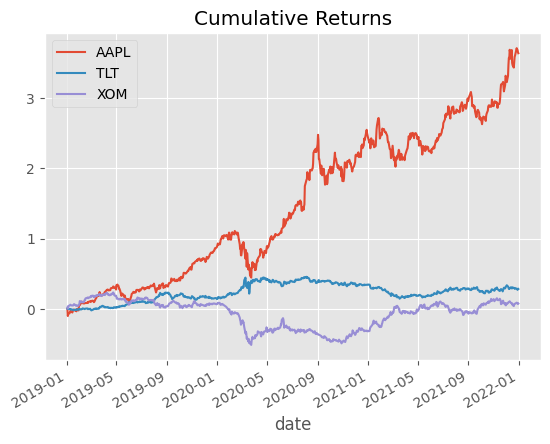

In [24]:
dsf.groupby('TICKER')['RET_C'].plot(legend=True, title = 'Cumulative Returns');

In [25]:
dsf.reset_index(inplace=True)

dsf

,date,PERMNO,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,...,SHROUT,CFACPR,CFACSHR,sprtrn,PRC_ADJ,PRC_ADJ_LAG1,RETURN,RET_DIFF,RET_G,RET_C
0,2019-01-02,11850,XOM,30231G10,NaN,0.0,NaN,NaN,69.69000,16727246,...,4233807,1,1,0.001269,69.69000,NaN,NaN,NaN,1.021997,0.021997
1,2019-01-03,11850,XOM,30231G10,NaN,0.0,NaN,NaN,68.62000,13866115,...,4233807,1,1,-0.024757,68.62000,69.69000,-0.015354,2.907160e-07,0.984646,0.006305
2,2019-01-04,11850,XOM,30231G10,NaN,0.0,NaN,NaN,71.15000,16043642,...,4233807,1,1,0.034336,71.15000,68.62000,0.036870,-2.827164e-07,1.036870,0.043408
3,2019-01-07,11850,XOM,30231G10,NaN,0.0,NaN,NaN,71.52000,10844159,...,4233807,1,1,0.007010,71.52000,71.15000,0.005200,2.810963e-07,1.005200,0.048833
4,2019-01-08,11850,XOM,30231G10,NaN,0.0,NaN,NaN,72.04000,11438966,...,4233807,1,1,0.009695,72.04000,71.52000,0.007271,-3.064877e-07,1.007271,0.056460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,2021-12-27,89468,TLT,46428743,NaN,0.0,NaN,NaN,148.88000,7854290,...,132000,1,1,0.013839,148.88000,148.52000,0.002424,-8.402909e-08,1.002424,0.292280
2267,2021-12-28,89468,TLT,46428743,NaN,0.0,NaN,NaN,148.28999,9173504,...,133200,1,1,-0.001010,148.28999,148.88000,-0.003963,9.672219e-09,0.996037,0.287159
2268,2021-12-29,89468,TLT,46428743,NaN,0.0,NaN,NaN,146.67000,11763496,...,133400,1,1,0.001402,146.67000,148.28999,-0.010924,5.269455e-07,0.989075,0.273097
2269,2021-12-30,89468,TLT,46428743,NaN,0.0,NaN,NaN,147.89999,10340148,...,133400,1,1,-0.002990,147.89999,146.67000,0.008386,1.048613e-07,1.008386,0.283773


I sometimes just use the name of the DatFrame to peak at my data.

In [26]:
dsf_wide = dsf.pivot_table(index='date', columns='TICKER', values='RET_C')

Note that `pivot_table()` is different from `pivot`. They do similar things, though.

In [27]:
dsf_wide

TICKER,AAPL,TLT,XOM
date,,,
2019-01-02,0.001141,0.005267,0.021997
2019-01-03,-0.098580,0.016706,0.006305
2019-01-04,-0.060099,0.004938,0.043408
2019-01-07,-0.062191,0.001975,0.048833
2019-01-08,-0.044314,-0.000658,0.056460
...,...,...,...
2021-12-27,3.710741,0.292280,0.090813
2021-12-28,3.683574,0.287159,0.087288
2021-12-29,3.685925,0.273097,0.077771


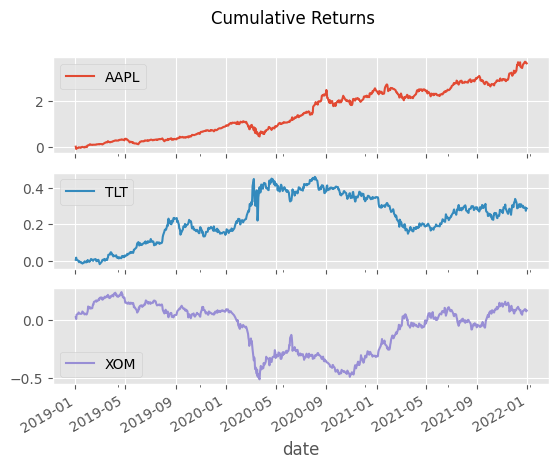

In [28]:
dsf_wide.plot(subplots = True, title = 'Cumulative Returns');


In [29]:
# Part 14 - Going wide

dsf_ret_wide = dsf.pivot_table(index = 'date', columns = 'TICKER', values = 'RET')
dsf_price_wide = dsf.pivot_table(index = 'date', columns = 'TICKER', values = 'PRC_ADJ')
